# **1. Perkenalan Dataset**


**Sumber Dataset**:  
   Dataset yang digunakan dalam proyek ini adalah dataset Iris, yang merupakan salah satu dataset klasik dan paling banyak digunakan untuk studi dasar machine learning. Dataset ini diperoleh dari kaggle dengan link : https://raw.githubusercontent.com/ailabtelkom/iris-dataset/master/Iris.csv. Dataset ini berisi 150 baris data. Berikut adalah deskripsi dari masing-masing fitur :

| Fitur         | Tipe Data | Satuan     | Deskripsi                                    |
| ------------- | --------- | ---------- | -------------------------------------------- |
| SepalLengthCm | Float     | centimeter | Panjang kelopak bunga iris                   |
| SepalWidthCm  | Float     | centimeter | Lebar kelopak bunga iris                     |
| PetalLengthCm | Float     | centimeter | Panjang mahkota bunga iris                   |
| PetalWidthCm  | Float     | centimeter | Lebar mahkota bunga iris                     |
| Species       | Kategori  | -          | Label target (Setosa, Versicolor, Virginica) |


**Tujuan Proyek**:
Tujuan utama dari proyek ini adalah untuk membangun model klasifikasi yang dapat memprediksi jenis spesies bunga iris berdasarkan keempat fitur ukurannya.

Secara khusus:
- Menggunakan fitur panjang dan lebar sepal dan petal sebagai input.
- Memprediksi label target yaitu Species:
   - Setosa (0)
   - Versicolor (1)
   - Virginica (2)
- Menerapkan teknik machine learning supervised classification.



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder, StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Saya menggunakan dataset yang berasal dari kaggle namun sudah saya unduh dan berada di folder dataset dengan file name : iris.csv

In [2]:
# 1. URL dataset
url = "https://raw.githubusercontent.com/ailabtelkom/iris-dataset/master/Iris.csv"

# 2. Load dataset
iris = pd.read_csv(url)

# 3. simpan file dataset di lokal dengan nama iris_raw.csv
path = "../iris_raw.csv"

# 4. Simpan file CSV
iris.to_csv(path, index=False)

# 5. Tampilkan 5 data teratas
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Cek info
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Statistik deskriptif
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


C:\Users\Dell\AppData\Local\Temp\ipykernel_15744\3711142412.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=iris, x='Species', palette='Set2')


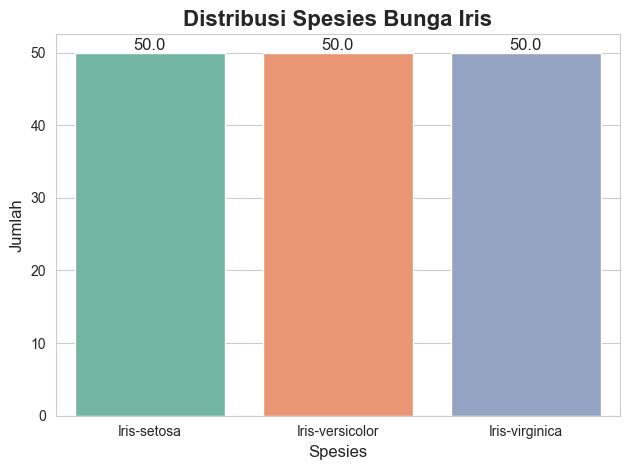

In [5]:
# Distribusi target
# Plot countplot dengan palette warna
sns.set_style("whitegrid")
ax = sns.countplot(data=iris, x='Species', palette='Set2')

# Menambahkan angka (annotate) di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

# Menambahkan judul dan label sumbu
plt.title('Distribusi Spesies Bunga Iris', fontsize=16, fontweight='bold')
plt.xlabel('Spesies', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tampilkan visualisasi
plt.tight_layout()
plt.show()

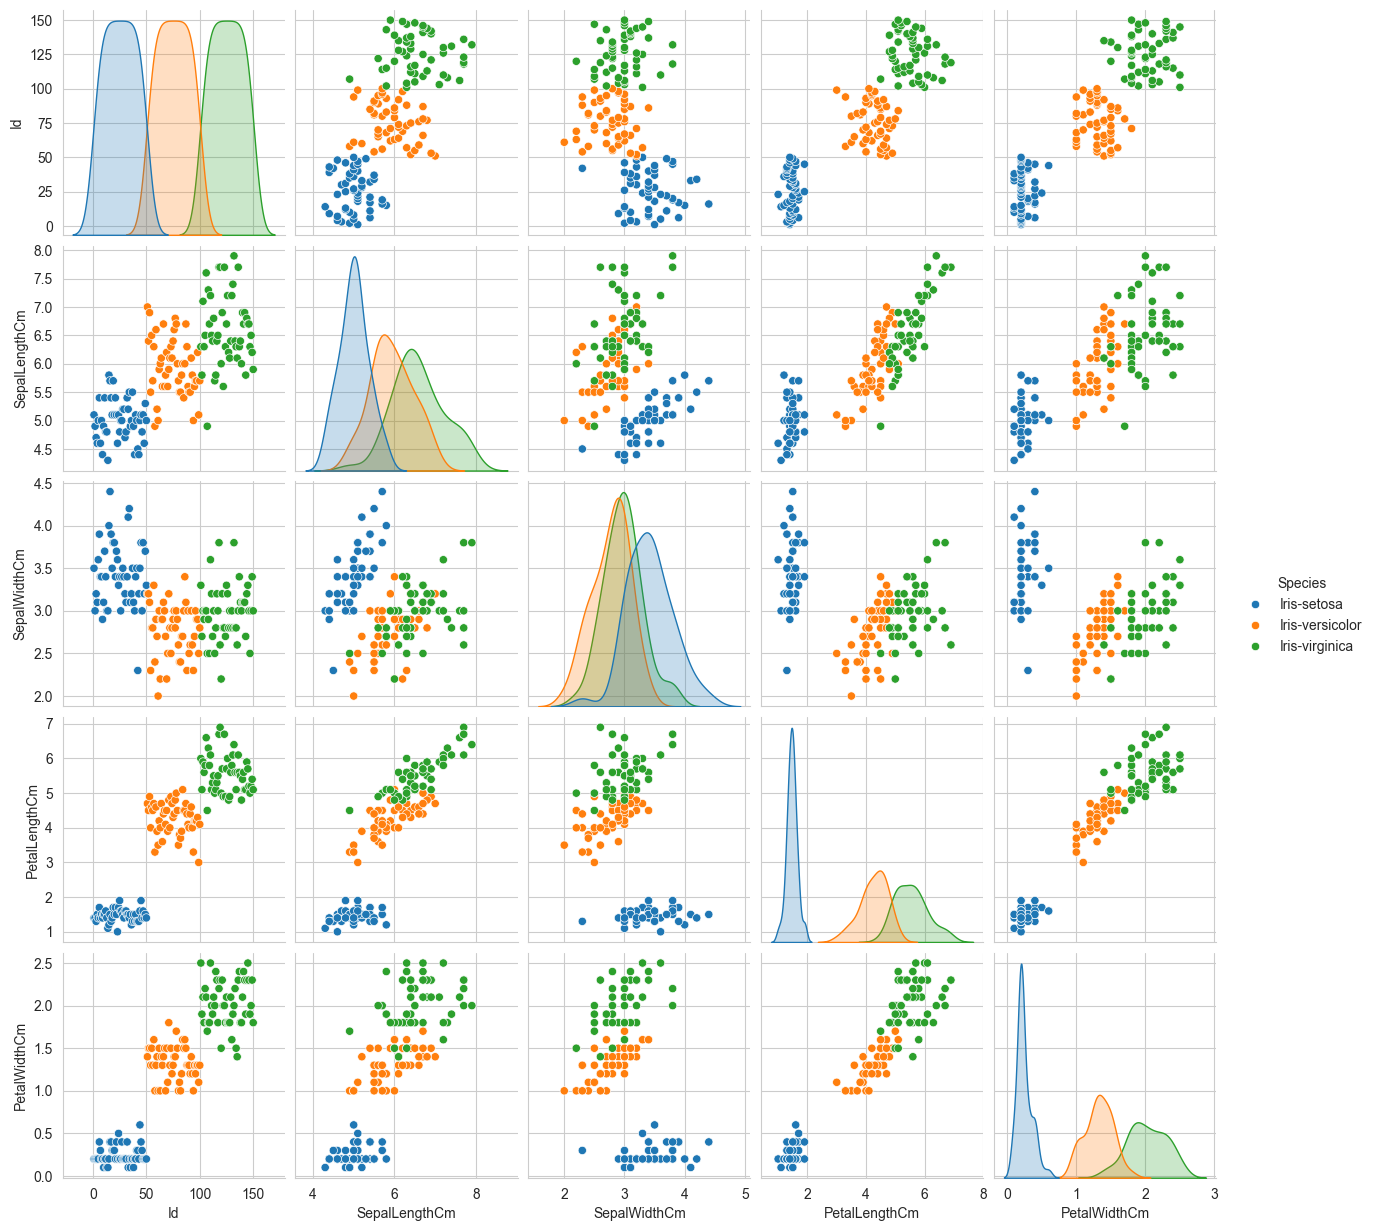

In [6]:
# Pairplot untuk melihat persebaran
sns.pairplot(iris, hue='Species')
plt.show()

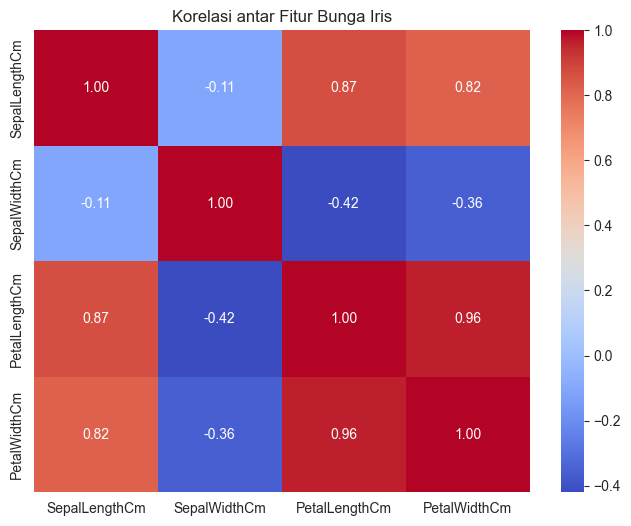

In [7]:
numerik = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Korelasi antar fitur
plt.figure(figsize=(8, 6))
sns.heatmap(numerik.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Fitur Bunga Iris')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# Cek null
print("Jumlah nilai null:")
print(iris.isnull().sum())

Jumlah nilai null:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [9]:
# Cek duplikat
print("\nJumlah duplikat:")
print(iris.duplicated().sum())


Jumlah duplikat:
0


In [10]:
# 1. Hapus kolom 'Id' (tidak digunakan dalam training)
if 'Id' in iris.columns:
    iris.drop('Id', axis=1, inplace=True)

In [11]:
# 2. Label Encoding kolom target 'Species'
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])  # Setosa=0, Versicolor=1, Virginica=2

In [12]:
# 3. Normalisasi fitur numerik
scaler = StandardScaler()
features = iris.columns[:-1]  # semua kecuali kolom target
iris[features] = scaler.fit_transform(iris[features])

In [13]:
# 4. Simpan hasil preprocessing
iris.to_csv('iris_preprocessing.csv', index=False)

print("Preprocessing selesai! Berikut contoh data:")
print(iris.head())

Preprocessing selesai! Berikut contoh data:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      -0.900681      1.032057      -1.341272     -1.312977        0
1      -1.143017     -0.124958      -1.341272     -1.312977        0
2      -1.385353      0.337848      -1.398138     -1.312977        0
3      -1.506521      0.106445      -1.284407     -1.312977        0
4      -1.021849      1.263460      -1.341272     -1.312977        0


In [14]:
print(iris.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
count   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02  150.000000
mean   -4.736952e-16 -6.631732e-16   3.315866e-16 -2.842171e-16    1.000000
std     1.003350e+00  1.003350e+00   1.003350e+00  1.003350e+00    0.819232
min    -1.870024e+00 -2.438987e+00  -1.568735e+00 -1.444450e+00    0.000000
25%    -9.006812e-01 -5.877635e-01  -1.227541e+00 -1.181504e+00    0.000000
50%    -5.250608e-02 -1.249576e-01   3.362659e-01  1.332259e-01    1.000000
75%     6.745011e-01  5.692513e-01   7.627586e-01  7.905908e-01    2.000000
max     2.492019e+00  3.114684e+00   1.786341e+00  1.710902e+00    2.000000


Interpretasi Outputnya :
- Fitur-Fitur Numerik (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm)

| Statistik | Penjelasan|
| ----- | ----- |
| **mean ≈ 0**  | Ini memang target dari **standardisasi**. Contoh: `mean ≈ -4.7e-16` itu secara praktis = 0                                      |
| **std ≈ 1**   | Ini juga target dari standardisasi; semua fitur punya skala yang **setara**, penting untuk model berbasis jarak seperti SVM/KNN |
| **min / max** | Rentang data jadi lebih simetris. Nilai negatif menunjukkan bahwa nilai itu **di bawah rata-rata**, dan sebaliknya              |



- Kolom Species
    - mean = 1.0 → karena encoding menghasilkan nilai:
        - Setosa = 0
        - Versicolor = 1
        - Virginica = 2
        → Maka rata-ratanya tepat di tengah, wajar banget.

    - std = 0.819 → menunjukkan variasi label cukup seimbang (tidak terlalu bias ke satu kelas)